In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd



# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

import sys
# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
import src.soporte_endoing as se

import numpy as np

# Para la visualización 
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Otros objetivos
# -----------------------------------------------------------------------
import math
from itertools import combinations


# Para pruebas estadísticas
# -----------------------------------------------------------------------
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

In [2]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Clases\\Semana 7\\datos\\online_shoppers_intention_clase_nonulls_estan_sinout.csv', index_col=0)
df.head()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Administrative_knn,ProductRelated_knn,BounceRates_knn
0,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Feb,MacOS,Mozilla Firefox,Region1,DT,Returning_Visitor,-0.263158,-0.566667,11.461524
1,-0.028789,0.0,0.0,-0.417913,2.095621,0.0,Feb,Windows,Google Chrome,Region1,OT,Returning_Visitor,-0.263158,-0.533333,-0.221550
2,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,Feb,iOS,Mozilla Firefox,Region9,RT,Returning_Visitor,-0.263158,-0.566667,-0.221550
3,-0.028789,0.0,0.0,-0.465829,3.215621,0.0,Feb,Linux,Google Chrome,Unknown,SMT,Returning_Visitor,-0.052632,-0.533333,2.699218
4,-0.028789,0.0,0.0,0.022315,0.695621,0.0,Feb,Linux,Tor,Region1,SMT,Returning_Visitor,-0.263158,-0.266667,0.946757


In [3]:
lista_col_categ =  df.select_dtypes(include='O').columns.tolist()
lista_col_categ

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType']

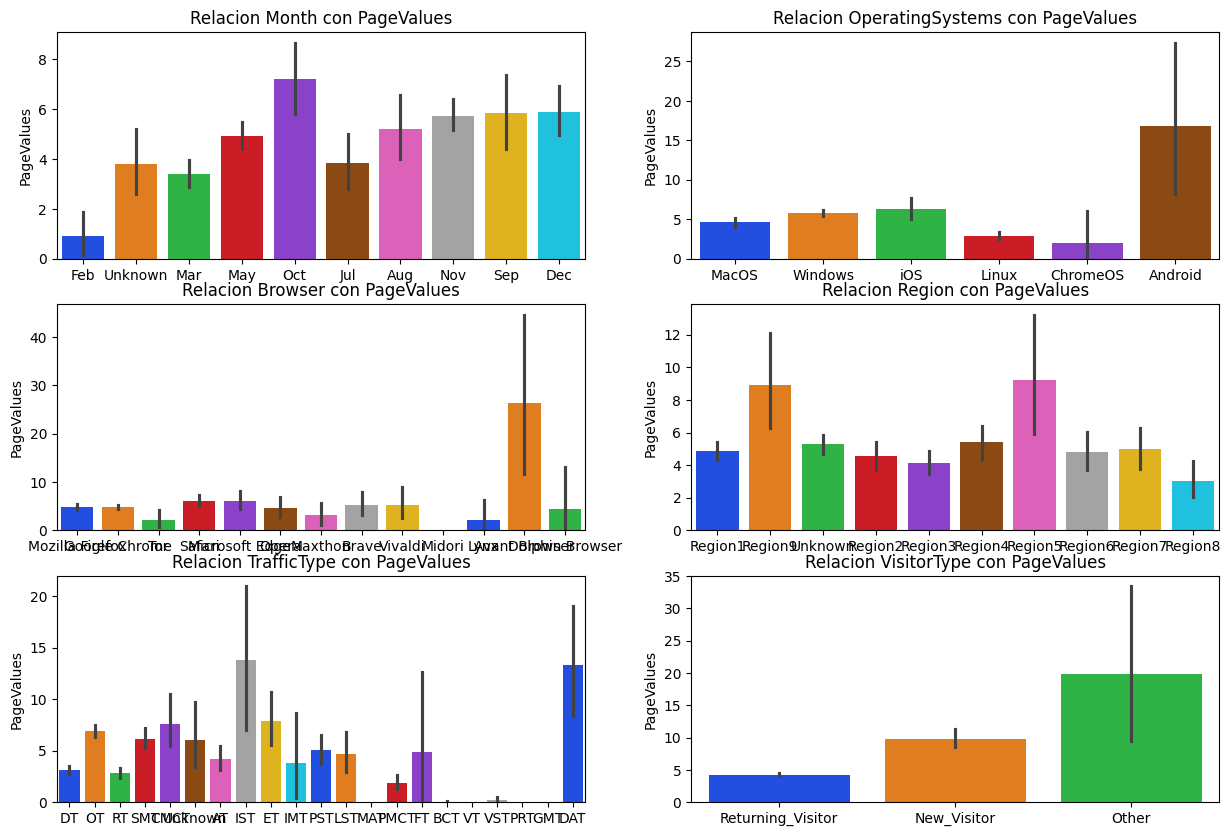

In [4]:
def visualizar_categoricas(dataframe, lista_col_cat, variable_respuesta, bigote=1.5, paleta = 'bright',tipo_grafica='boxplot', tamaño_grafica=(15,10), metrica_barplot = 'mean',):
    num_filas = math.ceil(len(lista_col_cat)/ 2)

    fig, axes = plt.subplots(nrows=num_filas, ncols=2, figsize=tamaño_grafica)

    axes = axes.flat

    for indice, columna in enumerate(lista_col_cat):
        if tipo_grafica.lower()=='boxplot':
            sns.boxplot(x=columna, 
                        y=variable_respuesta, 
                        data=dataframe,
                        whis=bigote,
                        hue=columna,
                        legend=False,
                        ax= axes[indice])
            
        elif tipo_grafica.lower()== 'barplot':
            sns.barplot(x=columna,
                        y=variable_respuesta,
                        ax = axes[indice],
                        data=dataframe,
                        estimator=metrica_barplot,
                        palette= paleta)
        else:
            print('No has elegido una grafica correcta')

        axes[indice].set_title(f'Relacion {columna} con {variable_respuesta}')
        axes[indice].set_xlabel('')

visualizar_categoricas(df, lista_col_categ, 'PageValues', tipo_grafica='barplot')

In [5]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "PageValues")
print("\n-------------\n")


for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "PageValues", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable MONTH
Para la columna PageValues, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Month las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Feb', 'Unknown', 'Mar', 'May', 'Oct', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec']

Realizando test de Kruskal...
Estadístico de prueba: 110.87951902355692
Valor p: 9.734841340762416e-20
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,0.7007,0.9987,-2.0968,3.4983,Aug-Dec
1,-4.2916,0.0879,-8.8669,0.2836,Aug-Feb
2,-1.3325,0.9734,-4.8637,2.1987,Aug-Jul
3,-1.8073,0.5529,-4.5773,0.9628,Aug-Mar
4,-0.2499,1.0000,-2.9059,2.4061,Aug-May
5,0.5487,0.9997,-2.1262,3.2237,Aug-Nov
6,2.0377,0.6512,-1.3100,5.3854,Aug-Oct
7,0.6813,0.9998,-2.8299,4.1925,Aug-Sep
8,-1.4022,0.9664,-4.9871,2.1827,Aug-Unknown
9,-4.9924,0.0036,-9.0248,-0.9599,Dec-Feb



###########################

Estamos analizando la variable OPERATINGSYSTEMS
Para la columna PageValues, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable OperatingSystems las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['MacOS', 'Windows', 'iOS', 'Linux', 'ChromeOS', 'Android']

Realizando test de Kruskal...
Estadístico de prueba: 95.3949229412871
Valor p: 4.931138293924995e-19
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-14.8160,0.0260,-28.5641,-1.0679,Android-ChromeOS
1,-13.9458,0.0000,-18.7401,-9.1514,Android-Linux
2,-12.2487,0.0000,-17.0420,-7.4555,Android-MacOS
3,-11.0562,0.0000,-15.7960,-6.3165,Android-Windows
4,-10.5558,0.0000,-15.7206,-5.3910,Android-iOS
5,0.8703,1.0000,-12.0805,13.8210,ChromeOS-Linux
6,2.5673,0.9932,-10.3831,15.5177,ChromeOS-MacOS
7,3.7598,0.9623,-9.1709,16.6904,ChromeOS-Windows
8,4.2602,0.9396,-8.8322,17.3526,ChromeOS-iOS
9,1.6970,0.0027,0.3977,2.9963,Linux-MacOS



###########################

Estamos analizando la variable BROWSER
Para la columna PageValues, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Browser las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Mozilla Firefox', 'Google Chrome', 'Tor', 'Safari', 'Microsoft Edge', 'Opera', 'Maxthon', 'Brave', 'Vivaldi', 'Midori', 'Lynx', 'Avant Browser', 'Dolphin Browser']

Realizando test de Kruskal...
Estadístico de prueba: 24.796094846683086
Valor p: 0.015819225687218597
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-20.9562,0.0000,-29.0855,-12.8270,Avant Browser-Brave
1,-21.9035,0.0858,-45.0765,1.2695,Avant Browser-Dolphin Browser
2,-21.4452,0.0000,-28.4063,-14.4841,Avant Browser-Google Chrome
3,-24.1471,0.0011,-42.6249,-5.6693,Avant Browser-Lynx
4,-23.0369,0.0000,-33.4270,-12.6468,Avant Browser-Maxthon
...,...,...,...,...,...
73,-2.5266,0.9901,-9.2195,4.1664,Opera-Tor
74,0.5206,1.0000,-5.6912,6.7325,Opera-Vivaldi
75,-3.9046,0.5245,-9.5546,1.7454,Safari-Tor
76,-0.8574,1.0000,-5.9283,4.2136,Safari-Vivaldi



###########################

Estamos analizando la variable REGION
Para la columna PageValues, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Region las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Region1', 'Region9', 'Unknown', 'Region2', 'Region3', 'Region4', 'Region5', 'Region6', 'Region7', 'Region8']

Realizando test de Kruskal...
Estadístico de prueba: 14.258700252477434
Valor p: 0.11341576108923737
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-0.3074,1.0000,-2.2666,1.6519,Region1-Region2
1,-0.7267,0.8743,-2.2161,0.7626,Region1-Region3
2,0.5504,0.9960,-1.3493,2.4500,Region1-Region4
3,4.3739,0.0030,0.8787,7.8691,Region1-Region5
4,-0.0529,1.0000,-2.3156,2.2099,Region1-Region6
5,0.1249,1.0000,-2.1995,2.4492,Region1-Region7
6,-1.7961,0.6674,-4.7833,1.1912,Region1-Region8
7,4.0606,0.0001,1.3253,6.7959,Region1-Region9
8,0.4356,0.9875,-0.8523,1.7236,Region1-Unknown
9,-0.4194,0.9998,-2.5648,1.7261,Region2-Region3



###########################

Estamos analizando la variable TRAFFICTYPE
Para la columna PageValues, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable TrafficType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['DT', 'OT', 'RT', 'SMT', 'CMCT', 'Unknown', 'AT', 'IST', 'ET', 'IMT', 'PST', 'LST', 'MAT', 'PMCT', 'FT', 'BCT', 'VT', 'VST', 'PRT', 'GMT', 'DAT']

Realizando test de Kruskal...
Estadístico de prueba: 229.98262241344295
Valor p: 1.2055470094087857e-37
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-4.1749,0.9959,-13.9978,5.6481,AT-BCT
1,3.4196,0.4922,-1.1920,8.0311,AT-CMCT
2,9.1110,0.0000,4.0823,14.1398,AT-DAT
3,-1.1145,0.9994,-4.1352,1.9062,AT-DT
4,3.6463,0.2001,-0.5678,7.8604,AT-ET
...,...,...,...,...,...
205,-5.9707,0.9964,-20.1708,8.2294,SMT-VST
206,-6.1530,0.9999,-24.6068,12.3008,SMT-VT
207,-5.8327,0.9980,-20.3656,8.7003,Unknown-VST
208,-6.0149,0.9999,-24.7261,12.6962,Unknown-VT



###########################

Estamos analizando la variable VISITORTYPE
Para la columna PageValues, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable VisitorType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Returning_Visitor', 'New_Visitor', 'Other']

Realizando test de Kruskal...
Estadístico de prueba: 18.55396131342189
Valor p: 9.355316658387552e-05
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,9.9769,0.0,5.5489,14.4048,New_Visitor-Other
1,-5.6041,0.0,-6.6518,-4.5563,New_Visitor-Returning_Visitor
2,-15.5809,0.0,-19.9145,-11.2474,Other-Returning_Visitor



###########################

